# Part 1: Scraping and building the database 
## Part 1.1: Saving the most important html files
So, obviously, this is the part, where I have to think very systemathically, because a good data structure will be helpful in the long term. I will scrape from tabbie first

In [1]:
#Import

import requests                     #This is for scraping
from bs4 import BeautifulSoup       #This is for scraping
import pandas as pd                 #This is for database usage
import numpy as np                  #This is is maths
import matplotlib as plt            #This is for plotting
import random as rand               #This is for making random stuff
import webbrowser                   #This is because we are working on the internet and it might come handy
import os                           #This is for creating folders etc.
import shutil                       #This is for moving folders, not just creating
#In case you need it, use magic: %pylab inline

In [2]:
# Create target Directory for html if don't exist
HTML_files = 'HTML_files_for_Python_SZISZ_besz'
if not os.path.exists(HTML_files):
    os.mkdir(str(HTML_files))
    print("Directory " , HTML_files ,  " Created ")
else:    
    print("Directory " , HTML_files ,  " already exists")

Directory  HTML_files_for_Python_SZISZ_besz  Created 


So, our data is EUDC 2015, EUDC 2016, EUDC 2017, EUDC 2018, EUDC 2019, it's time to play with these. 

In [3]:
#Link of the tournaments --> This should be the only raw  data? 
EUDC_2015 = "https://www.tabbie.org/Vienna-EUDC-2015/"
EUDC_2016 = "https://www.tabbie.org/warsaw-eudc-/"
EUDC_2017 = "https://www.tabbie.org/talinn-eudc-/"
EUDC_2018 = "https://novisadeudc.herokuapp.com/eudc2018/"
EUDC_2019 = "https://athenseudc.herokuapp.com/athenseudc/"

In [4]:
#Maybe it will be useful to know, if I have a tabbie or tabbiecat? --> that's why I use dict and not list
tabbie_or_tabbiecat = {EUDC_2015 : "tabbie", 
                       EUDC_2016 : "tabbie", 
                       EUDC_2017 : "tabbie", 
                       EUDC_2018 : "tabbycat", 
                       EUDC_2019 : "tabbycat"}

In [36]:
def move_2_project_folder(filename):         #makes a given file to a project folder where I collect all html files
    current_working_directory = os.getcwd()
    shutil.move(current_working_directory+"/"+filename, current_working_directory+"/"+HTML_files+"/"+filename)

        
def writing_html_file_from_source(filename, source):
    file_ = open(filename, "w")
    file_.write(source)
    file_.close()
    print(filename)                          #So, what is our filename? 
    move_2_project_folder(filename)          #It is time to move the html file to a folder created for html files

def save_html(filename, url):
    """
    It saves an html file, to a given string filename, if you give the url, which you want to save. 
    """
    print(url)                                #what is the input url?
    response = requests.get(url)              #request the webpage to be opened for reading
    print(response.status_code)               #hopefully 200 each --> successful download
    html_source = response.content.decode('utf-8')       #decoding the file html to a txt
    writing_html_file_from_source(filename, html_source) #puts the response to the project's html folder as a file
    return response

In [6]:
for core_of_tab in tabbie_or_tabbiecat:
    print(core_of_tab)

https://www.tabbie.org/Vienna-EUDC-2015/
https://www.tabbie.org/warsaw-eudc-/
https://www.tabbie.org/talinn-eudc-/
https://novisadeudc.herokuapp.com/eudc2018/
https://athenseudc.herokuapp.com/athenseudc/


In [8]:
#Getting the html files
overviews = []
teamtabs  = []
roundresults = []

In [9]:
yearcounter = 2015 #Our experiment starts from 2015... Luckyily, EUDC tournaments are named after their host city...
                   #And after the year they do exist. Beware, Budapest EUDC 2024... or 2025? or 2026... Who knows... :D
for core_of_tab in tabbie_or_tabbiecat: #name --> results are on 2 websites, tabbie, or tabbiecat
    """
    I am saving the html files from the tournaments: the teamtabs, and the overview, and in 2018, the results! 
    """
    if yearcounter < 2018:
        overview = save_html("EUDC_core_of_tab-" + str(yearcounter)  + ".html",core_of_tab) #saving the html
        overviews.append(overview)    #appending all requested html sites to the overview
        teamtab = save_html("EUDC_teamtab-" + str(yearcounter) + ".html", core_of_tab + "stats/team-tab/sort/object.name")
        teamtabs.append(teamtab)
    elif yearcounter == 2018: 
        overview =  save_html("EUDC_core_of_tab-" + str(yearcounter) + ".html",core_of_tab)
        overviews.append(overview)
        teamtab =  save_html("EUDC_teamtab-" + str(yearcounter) + ".html", core_of_tab + "tab/team/")
        teamtabs.append(teamtab)
        cot = core_of_tab
        for rounds in range(1, 10, 1):
            roundtab = save_html("EUDC-"+str(yearcounter)+"-round"+ str(rounds) +".html", cot + "results/round/" + str(rounds))
            roundresults.append(roundtab)
    else:
        overview =  save_html("EUDC_core_of_tab-" + str(yearcounter) + ".html",core_of_tab)
        overviews.append(overview)
        teamtab = save_html("EUDC_teamtab-" + str(yearcounter) + ".html", core_of_tab + "tab/team/" )
        teamtabs.append(teamtab)
    yearcounter = yearcounter + 1 
    print(yearcounter)
    
    
#I can print with: print(responses[3].content.decode('utf-8'))

https://www.tabbie.org/Vienna-EUDC-2015/
200
EUDC_core_of_tab-2015.html
https://www.tabbie.org/Vienna-EUDC-2015/stats/team-tab/sort/object.name
200
EUDC_teamtab-2015.html
2016
https://www.tabbie.org/warsaw-eudc-/
200
EUDC_core_of_tab-2016.html
https://www.tabbie.org/warsaw-eudc-/stats/team-tab/sort/object.name
200
EUDC_teamtab-2016.html
2017
https://www.tabbie.org/talinn-eudc-/
200
EUDC_core_of_tab-2017.html
https://www.tabbie.org/talinn-eudc-/stats/team-tab/sort/object.name
200
EUDC_teamtab-2017.html
2018
https://novisadeudc.herokuapp.com/eudc2018/
200


UnicodeEncodeError: 'charmap' codec can't encode character '\U0001f44b' in position 9285: character maps to <undefined>

In [10]:
print(overviews) 
print(teamtabs)
print(roundresults)

[<Response [200]>, <Response [200]>, <Response [200]>]
[<Response [200]>, <Response [200]>, <Response [200]>]
[]


elif yearcounter == 2018: 
        teamtab =  save_html("EUDC_teamtab-" + str(yearcounter) + ".html", core_of_tab + "tab/team/")
        teamtabs.append(teamtab)
        cot = core_of_tab
        for rounds in range(1, 10, 1):
            roundtab = save_html("EUDC-"+str(yearcounter)+"-round"+ str(rounds) +".html", cot + "results/round/" + str(rounds))
            roundresults.append(roundtab)
    else: 
        teamtab = save_html("EUDC_teamtab-" + str(yearcounter) + ".html", core_of_tab + "tab/team/" )
        teamtabs.append(teamtab)

In [11]:
#Heruko comes here

Since Jupyter can render page, it seems appropriate that I am doing it right away. So let's go. 

In [12]:
#We learned this on class! 
from IPython.display import HTML
def Jupyter_render(opened_html):
    if opened_html.status_code == 200:
        result = HTML(opened_html.content.decode('utf-8'))
    else:
        result = 'Nah, let\'s have a beer instead!'
    return result
#I can see it with:  Jupyter_render(response)
#Jupyter_render(overviews[0])

## Part 1.2: Getting the database data 
Now that I have saved the html files, it is time to scrape my tournament data, first: the tabbie files! 

In [13]:
data = []
teams = []
tabbie_core = [overviews[0], overviews[1], overviews[2]]
#tabbycat_core = [overviews[3],overviews[4]]
tabbie_teams = [ teamtabs[0], teamtabs[1], teamtabs[2]]
#tabbycat_teams = [ teamtabs[3], teamtabs[4]]


In [14]:
document = tabbie_teams[0].content
soup = BeautifulSoup(document, 'html.parser')
print(soup.prettify())

"
<div class='\"tab-team-container\"'>
 \n\n\t
 <h3>
  Team Tab
 </h3>
 \n\t\n\t
 <div class='\"grid-view\"' data-krajee-grid='\"kvGridInit_569bd340\"' id='\"team-tab\"'>
  <div class='\"kv-grid-container\"' id='\"team-tab-container\"'>
   <table class='\"kv-grid-table' kv-table-wrap\"="" table="" table-bordered="" table-hover="">
    <thead>
     \n\n
     <tr>
      <th data-col-seq='\"0\"' style='\"width:50px;\"'>
       <a data-sort='\"enl_place\"' href='\"/Vienna-EUDC-2015/stats/team-tab/sort/enl_place\"'>
        ENL
       </a>
      </th>
      <th data-col-seq='\"1\"' style='\"width:50px;\"'>
       <a data-sort='\"esl_place\"' href='\"/Vienna-EUDC-2015/stats/team-tab/sort/esl_place\"'>
        ESL
       </a>
      </th>
      <th data-col-seq='\"4\"'>
       <a class='\"asc\"' data-sort='\"-object.name\"' href='\"/Vienna-EUDC-2015/stats/team-tab/sort/-object.name\"'>
        Team
       </a>
      </th>
      <th data-col-seq='\"5\"' style='\"width:20px;\"'>
       <a data-s

In [15]:
#SAVING THE RESULT OF TEAMS 
#Using the technique from class: 
def getteams_tabbie(teamtab, toprint):
    """
    If toprint is True, it prints the taken urls, if not, it won't print
    """
    result = []
    document = teamtab.content
    soup = BeautifulSoup(document, 'html.parser')
    for urls in soup.find_all('a'):
        if "/team/" in urls.get('href'):
            team_url = urls.get('href')
            team_url = team_url[3:-2]
            result.append(team_url)
    if toprint == True:
        print(result)
    return result

for teamtab in tabbie_teams:
    teamlist = getteams_tabbie(teamtab, False)
    for team in teamlist:
        print(team)
        teams.append(team)

Vienna-EUDC-2015/team/277
Vienna-EUDC-2015/team/464
Vienna-EUDC-2015/team/280
Vienna-EUDC-2015/team/372
Vienna-EUDC-2015/team/273
Vienna-EUDC-2015/team/272
Vienna-EUDC-2015/team/473
Vienna-EUDC-2015/team/475
Vienna-EUDC-2015/team/306
Vienna-EUDC-2015/team/337
Vienna-EUDC-2015/team/449
Vienna-EUDC-2015/team/472
Vienna-EUDC-2015/team/471
Vienna-EUDC-2015/team/485
Vienna-EUDC-2015/team/455
Vienna-EUDC-2015/team/385
Vienna-EUDC-2015/team/420
Vienna-EUDC-2015/team/482
Vienna-EUDC-2015/team/460
Vienna-EUDC-2015/team/508
Vienna-EUDC-2015/team/502
Vienna-EUDC-2015/team/500
Vienna-EUDC-2015/team/314
Vienna-EUDC-2015/team/871
Vienna-EUDC-2015/team/489
Vienna-EUDC-2015/team/379
Vienna-EUDC-2015/team/363
Vienna-EUDC-2015/team/349
Vienna-EUDC-2015/team/344
Vienna-EUDC-2015/team/293
Vienna-EUDC-2015/team/380
Vienna-EUDC-2015/team/369
Vienna-EUDC-2015/team/287
Vienna-EUDC-2015/team/417
Vienna-EUDC-2015/team/329
Vienna-EUDC-2015/team/299
Vienna-EUDC-2015/team/304
Vienna-EUDC-2015/team/271
Vienna-EUDC-

In [16]:
for team in teams:
    print(team)

Vienna-EUDC-2015/team/277
Vienna-EUDC-2015/team/464
Vienna-EUDC-2015/team/280
Vienna-EUDC-2015/team/372
Vienna-EUDC-2015/team/273
Vienna-EUDC-2015/team/272
Vienna-EUDC-2015/team/473
Vienna-EUDC-2015/team/475
Vienna-EUDC-2015/team/306
Vienna-EUDC-2015/team/337
Vienna-EUDC-2015/team/449
Vienna-EUDC-2015/team/472
Vienna-EUDC-2015/team/471
Vienna-EUDC-2015/team/485
Vienna-EUDC-2015/team/455
Vienna-EUDC-2015/team/385
Vienna-EUDC-2015/team/420
Vienna-EUDC-2015/team/482
Vienna-EUDC-2015/team/460
Vienna-EUDC-2015/team/508
Vienna-EUDC-2015/team/502
Vienna-EUDC-2015/team/500
Vienna-EUDC-2015/team/314
Vienna-EUDC-2015/team/871
Vienna-EUDC-2015/team/489
Vienna-EUDC-2015/team/379
Vienna-EUDC-2015/team/363
Vienna-EUDC-2015/team/349
Vienna-EUDC-2015/team/344
Vienna-EUDC-2015/team/293
Vienna-EUDC-2015/team/380
Vienna-EUDC-2015/team/369
Vienna-EUDC-2015/team/287
Vienna-EUDC-2015/team/417
Vienna-EUDC-2015/team/329
Vienna-EUDC-2015/team/299
Vienna-EUDC-2015/team/304
Vienna-EUDC-2015/team/271
Vienna-EUDC-

AT THIS POINT, IT IS NECESSARY TO LOG IN TO TABBIE.ORG

In [17]:
# !conda install lxml
# !conda install selenium -y

In [18]:
from requests import Session
from lxml import html
import urllib3
import os
import selenium
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException

In [59]:
driver = webdriver.Chrome()

In [60]:
driver.get('https://tabbie.org/site/login')

In [61]:
email_field = driver.find_element_by_css_selector('input#loginform-email')
email_field.send_keys('bandi.szakkoli@gmail.com')

psw_field = driver.find_element_by_css_selector('input#loginform-password')
psw_field.send_keys('emberarcu')

login_button = driver.find_element_by_css_selector('button.btn.btn-primary')
login_button.click()

<html lang="en"><head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1">

    <meta name="csrf-param" content="_csrf">
    <meta name="csrf-token" content="bDIuWmtYaFQmf2QNWhMPFl4DaREHCjwCFAdgDi41Gh4dY3c/KDYQeQ==">
    <title>UCC Philosoph B :: Tabbie2</title>
    <meta name="apple-mobile-web-app-capable" content="yes">
<link href="//maxcdn.bootstrapcdn.com/bootstrap/3.3.5/css/bootstrap.min.css" rel="stylesheet">
<link href="/assets/605f5be6/css/site.css" rel="stylesheet">    <link href="//maxcdn.bootstrapcdn.com/font-awesome/4.3.0/css/font-awesome.min.css" rel="stylesheet">

</head>
<body class="">

<div class="flashes">
    </div>

<div class="wrap">
    <nav id="w3" class="navbar-inverse navbar-fixed-top navbar" role="navigation"><div class="container"><div class="navbar-header"><button type="button" class="navbar-toggle" data-toggle="collapse" data-target="#w3-collapse"><span class="sr-only">Toggle navigation</span>
<span class="ico
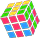

In [62]:
driver.get("https://tabbie.org/" + "talinn-eudc-/team/17523")
html_source = driver.page_source
print(html_source)

In [68]:
writing_html_file_from_source("another_test.html", html_source)

another_test.html


In [70]:
writing_html_file_from_source("talinn-eudc-team-17523.html", html_source)

talinn-eudc-team-17523.html


In [71]:
writing_html_file_from_source("talinn-eudc-team-17523.txt", html_source)

talinn-eudc-team-17523.txt


Classes: teams, debaters, debates, speaker points, judges, rounds, motions, ESL status, institutions, tournaments

In [77]:
for team in teams:
    print("https://tabbie.org/" + team)
    driver.get("https://tabbie.org/" + team)
    html_source = driver.page_source
    filename = team.replace("/", "-") + ".html"
    file_ = open(filename, "w")
    file_.write(html_source)
    file_.close()
    print(filename)      #So, what is our filename? 
    #It is time to move the html file to a folder created for html files    
    move_2_project_folder(filename) 

https://tabbie.org/Vienna-EUDC-2015/team/277
Vienna-EUDC-2015-team-277.html
https://tabbie.org/Vienna-EUDC-2015/team/464


UnicodeEncodeError: 'charmap' codec can't encode character '\u0107' in position 14542: character maps to <undefined>

In [55]:
    
def writing_html_file_from_selenium(filename, source):
    file_ = open(filename, "w")
    file_.write(source)
    file_.close()
    print(filename)      #So, what is our filename? 
    #It is time to move the html file to a folder created for html files    
    move_2_project_folder(filename) 